# Revisão 
### AF_2019_2 - Ciência dos Dados

___

# Nome: <font color=red>**G A B A R I T O**</font>

___

In [1]:
# Imports que podem ser úteis

import pandas as pd;
import seaborn as sns # evite fazer pairplot! Estoura a memória
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats
from scipy.stats import expon, binom, t, norm, probplot
%matplotlib inline

___

### PROBLEMA para as Questões 1 e 2

A Marvak, uma renomada loja de departamentos, decidiu realizar uma pesquisa para verificar uma possível associação entre algumas características de seus clientes com seus gastos anuais na loja.

Dessa forma, foi selecionada aleatoriamente uma amostra aleatória de $1.000$ clientes que já fizeram compra na Marvak em todas as filiais no último ano e foram observadas as seguintes informações:

* **IDADE**: idade do cliente, que foi categorizada em jovem (até 30 anos), adulto (de 31 a 55 anos) ou idoso (56 ou mais anos);
* **SEXO**: sexo do cliente (feminino ou masculino);
* **RESIDENCIA**: tipo de residência do cliente (alugada ou própria);
* **EC**: estado civil do cliente (casado ou solteiro);
* **SALARIO_ANUAL**: salário anual do cliente (em reais); e
* **GASTO_ANUAL**: gasto total anual do cliente em compras realizadas na Marvak (em reais).


In [2]:
dados = pd.read_excel("Marvak.xlsx")

In [3]:
dados.head()

,ID,IDADE,SEXO,RESIDENCIA,EC,SALARIO_ANUAL,GASTO_ANUAL
0,1,Jovem,Feminino,Alugada,Solteiro,86000.00,1053.00
1,2,Jovem,Feminino,Propria,Casado,48543.74,321.03
2,3,Jovem,Feminino,Propria,Solteiro,14760.10,375.03
3,4,Adulto,Feminino,Alugada,Solteiro,19900.00,262.00
4,5,Idoso,Masculino,Alugada,Casado,119000.00,278.00


In [4]:
dados.columns

Index(['ID', 'IDADE', 'SEXO', 'RESIDENCIA', 'EC', 'SALARIO_ANUAL',
       'GASTO_ANUAL'],
      dtype='object')

In [5]:
dados.IDADE = dados.IDADE.astype('category')
dados.SEXO = dados.SEXO.astype('category')
dados.RESIDENCIA = dados.RESIDENCIA.astype('category')
dados.EC = dados.EC.astype('category')

In [6]:
dados.dtypes

ID                  int64
IDADE            category
SEXO             category
RESIDENCIA       category
EC               category
SALARIO_ANUAL     float64
GASTO_ANUAL       float64
dtype: object

___

### Questão 1 - Teste de Hipóteses

O departamento financeiro da Marvak acredita que os clientes de qualquer filial dessa rede gastaram, em média, mais do que $500$ reais no último ano.

Levando em consideração a amostra disponível na base de dados, verifique se há evidências suficiente para afirmar que a suspeita do departamento financeiro procede.

**Para resolução desta questão, deixe claro:**

1) Construção das Hipóteses Nula e Alternativa em termos do problema e do parâmetro. 

2) Cálculo do valor *p* do teste. 

3) Conclusão em termos do problema, deixando claro quais resultados foram utilizados para tal decisão. 

4) Qual ou quais suposições foram feitas para a escolha da distribuição utilizada no item (2) desta questão. Se há suposição para a distribuição de probabilidades da variáveis de interesse, verifique-a de utilizando algum recurso gráfico. 

**R.:**
1)

H0 - mu0 = 500 (Suspeita não procede)

HA - mu0 > 500 (Suspeita procede)

**R.:**
2)

In [19]:
x_obs = dados["GASTO_ANUAL"].mean()
s = dados["GASTO_ANUAL"].std()
mu0 = 500
n = len(dados["GASTO_ANUAL"])

t_obs=(x_obs-mu0)/(s/np.sqrt(n))
valor_p = 1 - t.cdf(t_obs, df=n-1)

print(f'Média Amostral:         {x_obs:.4f}')
print(f'Desvio padrão Amostral: {s:.4f}')
print(f'Tamanho da amostra:     {n:.0f}')
print(f'Valor-p:                {valor_p*100:.4f}%')

Média Amostral:         528.7877
Desvio padrão Amostral: 331.0430
Tamanho da amostra:     1000
Valor-p:                0.3034%


**R.:**
3)

Com base no dados do valor_p obtido, pode-se afirmar que a hipótese nula é rejeitada com um nível de confiança de, aproximadamente, 99%.
Por isso, há evidências suficientes para confirmar a suspeita.

**R.:**
4)

As suposições feitas para a escolha da distribuição utilizada no item 2, é que a variável de interesse segue uma distribuição Normal.

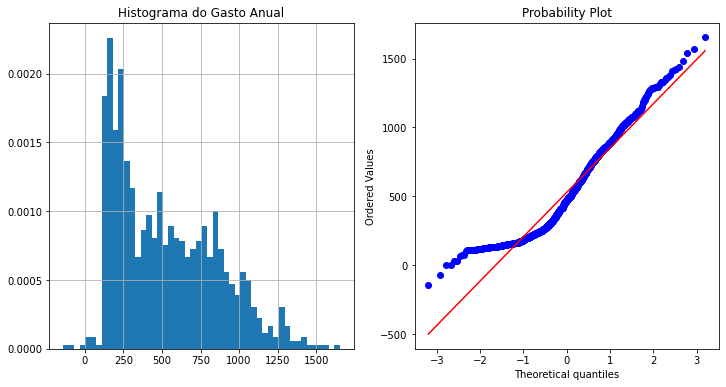

In [22]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("Histograma do Gasto Anual")
dados["GASTO_ANUAL"].hist(density=True, bins=50)
plt.subplot(122)
probplot(dados["GASTO_ANUAL"], plot=plt);

### Questão 2 - Modelo de predição

Assuma que o objetivo da Marvak seja traçar o perfil de clientes com maior potencial de consumo na loja Marvak. Ou seja, considerando as variáveis mensuradas na base de dados, quais as características que melhor definem o segmento de clientes da Marvak.

Assim, considere que a variável `GASTO_ANUAL` é a variável-alvo a ser predita e as demais variáveis da base de dados são as variáveis explicativas.

 
**Para resolução desta questão, faça:**

1) Gráfico de dispersão do `SALARIO_ANUAL` versus `GASTO_ANUAL` separando os clientes que residem em casa `Alugada` e casa `Propria`. Interprete-o.
 

 
2) Considerando apenas os clientes que possuem residência `Alugada`, ajuste uma reta para prever `GASTO_ANUAL` de acordo com o `SALARIO_ANUAL` do cliente. Considerando o valor *p* de um ajuste linear, a reta é significante? Qual deve ser o `GASTO_ANUAL` previsto para um cliente que possui residência `Alugada` e `SALARIO_ANUAL` de 130 mil reais? 
 

 
3) Considerando apenas os clientes que possuem residência `Propria`, ajuste uma reta para prever `GASTO_ANUAL` de acordo com o `SALARIO_ANUAL` do cliente. Considerando o valor *p* de um ajuste linear, a reta é significante? Qual deve ser o `GASTO_ANUAL` previsto para um cliente que possui residência `Propria` e `SALARIO_ANUAL` de 130 mil reais? 

4) As variáveis `RESIDENCIA` e  `SALARIO_ANUAL` poderiam ser consideradas simultaneamente num modelo de regressão para estimar `GASTO_ANUAL` de um cliente da Marvak? Justifique. **Nota:** Aqui não é necessário ajustar um modelo, mas sim explicar se seria possível e como você procederia deixando claro os cuidados que teria para incluir ambas as variáveis no modelo.
 

**R.:**
1)

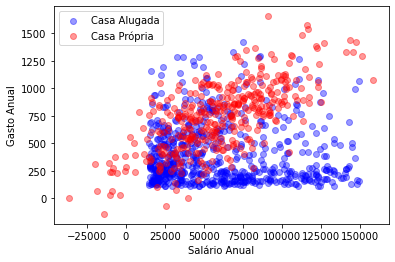

In [26]:
casa_alugada = dados.loc[dados["RESIDENCIA"] == "Alugada", ["SALARIO_ANUAL", "GASTO_ANUAL"]]
casa_propria = dados.loc[dados["RESIDENCIA"] == "Propria", ["SALARIO_ANUAL", "GASTO_ANUAL"]]

plt.scatter(casa_alugada["SALARIO_ANUAL"], casa_alugada["GASTO_ANUAL"], label="Casa Alugada", color='b', alpha=.4)
plt.scatter(casa_propria["SALARIO_ANUAL"], casa_propria["GASTO_ANUAL"], label="Casa Própria", color='r', alpha=.4)
plt.legend()
plt.xlabel("Salário Anual")
plt.ylabel("Gasto Anual")
plt.show()

**R.:**
2)

In [30]:
x_alugada = casa_alugada["SALARIO_ANUAL"]
y_alugada = casa_alugada["GASTO_ANUAL"]

X_alugada = sm.add_constant(x_alugada)

modelo_alugada = sm.OLS(y_alugada, X_alugada)    
resultado_alugada = modelo_alugada.fit()   

resultado_alugada.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            GASTO_ANUAL   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4290
Date:                Mon, 30 Nov 2020   Prob (F-statistic):              0.513
Time:                        12:13:21   Log-Likelihood:                -4370.1
No. Observations:                 622   AIC:                             8744.
Df Residuals:                     620   BIC:                             8753.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           411.2357     21.137     19.456      0.000     369.727     452.745
SALARIO_ANUAL    -0.0002      0.000     -0.655      0.513      -0.001       0.000
==============================================================================
Omnibus:                      127.098   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.269
Skew:                           1.293   Prob(JB):                     3.61e-46
Kurtosis:                       4.178   Cond. No.                     1.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Como o valor P encontrado para a varíavel SALARIO_ANUAL é muito alto (para um nível de significância de pelo menos 10%), não podemos rejeitar a hipótese nula de que Beta = 0. Por esse motivo, podemos afirmar que a reta não é significante.

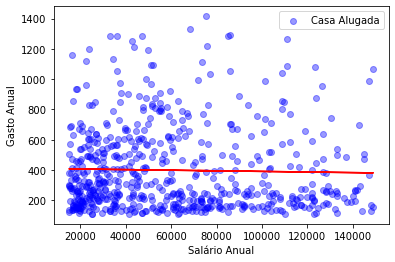

In [46]:
plt.scatter(casa_alugada["SALARIO_ANUAL"], casa_alugada["GASTO_ANUAL"], label="Casa Alugada", color='b', alpha=.4)
plt.plot(x_alugada, resultado_alugada.predict(), color="r")
plt.legend()
plt.xlabel("Salário Anual")
plt.ylabel("Gasto Anual")
plt.show()

In [42]:
resultado_alugada.predict((1,130000))

array([385.51494615])

**R.:**
3)

In [48]:
x_propria = casa_propria["SALARIO_ANUAL"]
y_propria = casa_propria["GASTO_ANUAL"]

X_propria = sm.add_constant(x_propria)

modelo_propria = sm.OLS(y_propria, X_propria)    
resultado_propria = modelo_propria.fit()   

resultado_propria.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            GASTO_ANUAL   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     340.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           1.24e-54
Time:                        13:33:19   Log-Likelihood:                -2580.0
No. Observations:                 378   AIC:                             5164.
Df Residuals:                     376   BIC:                             5172.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           350.9599     24.084     14.572      0.000     303.603     398.316
SALARIO_ANUAL     0.0065      0.000     18.461      0.000       0.006       0.007
==============================================================================
Omnibus:                        0.049   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.976   Jarque-Bera (JB):                0.005
Skew:                           0.009   Prob(JB):                        0.997
Kurtosis:                       3.007   Cond. No.                     1.44e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Como o valor P encontrado para a varíavel SALARIO_ANUAL é baixo (para um nível de significância de pelo menos 10%), podemos rejeitar a hipótese nula de que Beta = 0. Por esse motivo, podemos afirmar que a reta é significante.

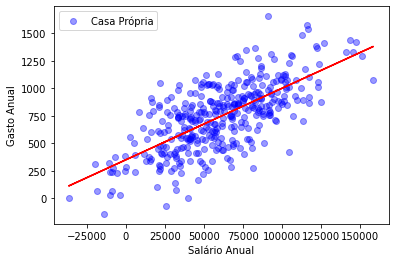

In [50]:
plt.scatter(casa_propria["SALARIO_ANUAL"], casa_propria["GASTO_ANUAL"], label="Casa Própria", color='b', alpha=.4)
plt.plot(x_propria, resultado_propria.predict(), color="r")
plt.legend()
plt.xlabel("Salário Anual")
plt.ylabel("Gasto Anual")
plt.show()

In [51]:
resultado_propria.predict((1,130000))

array([1194.4832804])

**R.:**
4)

As variáveis RESIDENCIA e SALARIO_ANUAL poderiam ser consideradas simultaneamente num modelo de regressão múltipla para estimar GASTO_ANUAL de um cliente da Marvak. O cuidado que deveria ser feito antes da criação do modelo, seria a transformação da variável qualitativa RESIDENCIA em uma variável quantitativa binária.

___

### Questão 3 - Variáveis aleatórias

**(Questão extraída do ENADE 2017) **

Suponha que determinado programa de computador seja executado por meio de 13 etapas, com tempo médio de 50 segundos ao todo e dispersão relativa de 10% em torno da média.

Considere que uma equipe de engenharia propõe um novo algoritmo que reduz em 30% o tempo de execução de todas as 13 etapas desse programa.

Nesse contexto, avalie as afirmações a seguir, a respeito do tempo de execução do novo algoritmo.

    I.	O tempo médio por etapa será 32,5 segundos.
    II.	O desvio-padrão permanecerá inalterado.
    III.	A dispersão relativa em torno da média permanecerá inalterada.

É correto o que se afirma em: 
    
    A)	I, apenas
    B)	III, apenas
    C)	I e II, apenas
    D)	II e III, apenas
    E)	I, II e III

Deixe aqui seu RACIOCÍNIO feito para A ESCOLHA DA ALTERNATIVA ASSINALADA!! 

(ESTE EXERCÍCIO SERÁ ANULADO SE NÃO HOUVER DESENVOLVIMENTO DE RACIOCÍNIO PARA A ESCOLHA DA ALTERNATIVA, MESMO SE ASSINALADA A RESPOSTA CORRETA)

É útil saber que **dispersão relativa** é dada pela seguinte fórmula:

$$DR = \frac{\sigma}{\mu}$$

**R.**



In [62]:
etapas = 13
mu_total = 50
std_total = 0.1*50
var_total = std_total**2

# 1
mu_total_novo = mu_total*0.7
var_total_novo = (0.7**2)*var_total
std_total_novo = var_total_novo**0.5
dispercao_relativa = std_total_novo/mu_total_novo
print(f"Tempo médio de cada etapa: {mu_total_novo/etapas}")
print(f"Desvio-padrão novo: {std_total_novo}")
print(f"Disperção relativa novo: {dispercao_relativa}")

Tempo médio de cada etapa: 2.6923076923076925
Desvio-padrão novo: 3.4999999999999996
Disperção relativa novo: 0.09999999999999999


Alternativa B